## LUNG CANCER PREDICTON 

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout

import warnings
warnings.filterwarnings("ignore")

In [7]:
path = r"C:\Users\Vinay\Documents\Physician.Ai\Trained Model\ct scan lung cancer\Data"
for files in os.listdir(path):
    print(os.path.join(path,files))

C:\Users\Vinay\Documents\Physician.Ai\Trained Model\ct scan lung cancer\Data\test
C:\Users\Vinay\Documents\Physician.Ai\Trained Model\ct scan lung cancer\Data\train
C:\Users\Vinay\Documents\Physician.Ai\Trained Model\ct scan lung cancer\Data\valid


In [8]:
valid_dir = r"C:\Users\Vinay\Documents\Physician.Ai\Trained Model\ct scan lung cancer\Data\valid"
test_dir = r"C:\Users\Vinay\Documents\Physician.Ai\Trained Model\ct scan lung cancer\Data\test"
train_dir = r"C:\Users\Vinay\Documents\Physician.Ai\Trained Model\ct scan lung cancer\Data\train"

In [9]:
for dirpath, dirnames, filenames in os.walk(train_dir):
      print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 0 images in 'C:\Users\Vinay\Documents\Physician.Ai\Trained Model\ct scan lung cancer\Data\train'.
There are 0 directories and 195 images in 'C:\Users\Vinay\Documents\Physician.Ai\Trained Model\ct scan lung cancer\Data\train\adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'.
There are 0 directories and 115 images in 'C:\Users\Vinay\Documents\Physician.Ai\Trained Model\ct scan lung cancer\Data\train\large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'.
There are 0 directories and 148 images in 'C:\Users\Vinay\Documents\Physician.Ai\Trained Model\ct scan lung cancer\Data\train\normal'.
There are 0 directories and 155 images in 'C:\Users\Vinay\Documents\Physician.Ai\Trained Model\ct scan lung cancer\Data\train\squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'.


In [11]:
normal_img_path = r'C:\Users\Vinay\Documents\Physician.Ai\Trained Model\ct scan lung cancer\Data\train\normal'
print(os.listdir(normal_img_path))

['10 (2) - Copy.png', '10 (2).png', '10 - Copy (2) - Copy.png', '10 - Copy (2).png', '10 - Copy (3).png', '10 - Copy - Copy.png', '10 - Copy.png', '10.png', '11 (2) - Copy.png', '11 (2).png', '11 - Copy (2) - Copy.png', '11 - Copy (2).png', '11 - Copy (3).png', '11 - Copy - Copy.png', '11 - Copy.png', '11.png', '12 (2) - Copy.png', '12 (2).png', '12 - Copy (2) - Copy.png', '12 - Copy (2).png', '12 - Copy (3).png', '12 - Copy - Copy.png', '12 - Copy.png', '12.png', '13 (2) - Copy.png', '13 (2).png', '13 - Copy (2) - Copy.png', '13 - Copy (2).png', '13 - Copy (3).png', '13 - Copy - Copy.png', '13 - Copy.png', '13.png', '16 (2) - Copy.png', '16 (2).png', '16 - Copy (2) - Copy.png', '16 - Copy (2).png', '16 - Copy (3).png', '16 - Copy - Copy.png', '16 - Copy.png', '16.png', '17 (2) - Copy.png', '17 (2).png', '17 - Copy (2) - Copy.png', '17 - Copy (2).png', '17 - Copy (3).png', '17 - Copy - Copy.png', '17 - Copy.png', '17.png', '18 (2) - Copy.png', '18 (2).png', '18 - Copy (2) - Copy.png', 

(345, 440, 4)


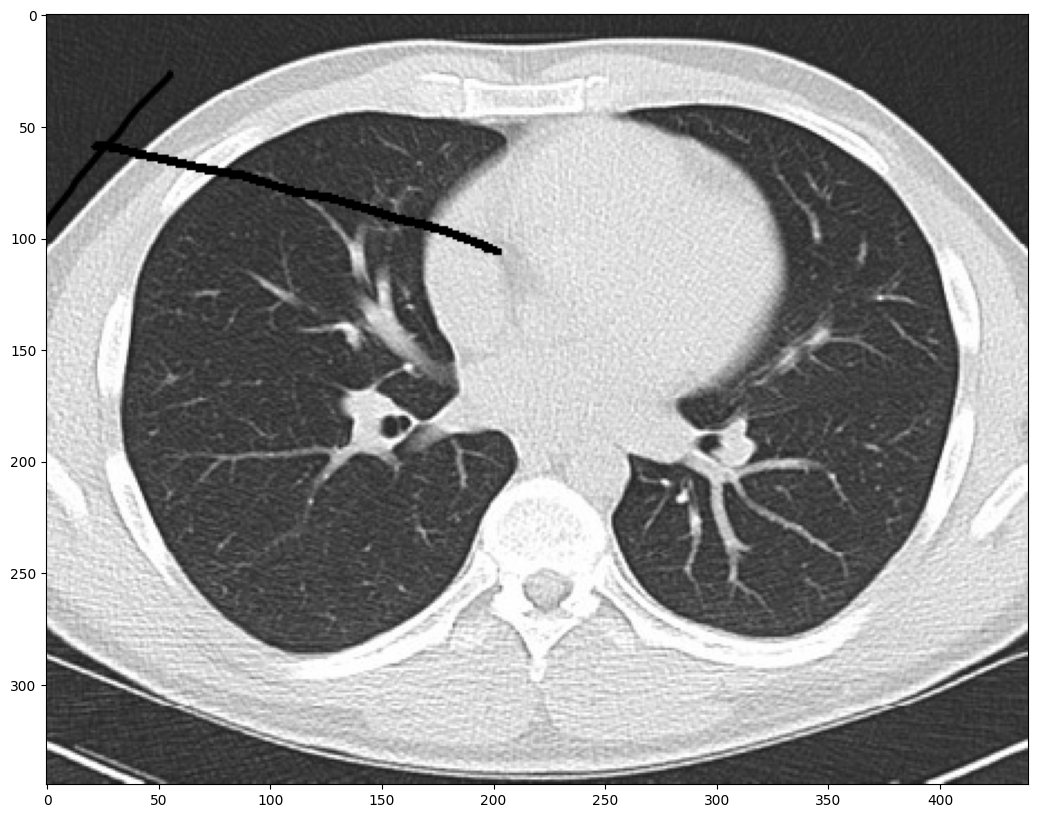

In [12]:
random_image = random.sample(os.listdir(normal_img_path), 1)
# print(random_image)

plt.figure(figsize=(14,10))
img = mpimg.imread(normal_img_path + "/" + random_image[0])
print(img.shape)
plt.imshow(img, cmap="bone");

In [13]:
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE)

valid_data = tf.keras.preprocessing.image_dataset_from_directory(valid_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False) # don't shuffle test data for prediction analysis

Found 613 files belonging to 4 classes.
Found 72 files belonging to 4 classes.
Found 315 files belonging to 4 classes.


In [14]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=(224, 224, 3), name="input_layer") 
x = base_model(inputs, training=False) 
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
x = layers.Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(4, activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 23s 1us/step


In [15]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling          │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,224,007 (16.11 MB)

 Trainable params: 174,436 (681.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [16]:
# Compile
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit
history = model.fit(train_data,
                    epochs=20,
                    validation_data=valid_data
                    )

Epoch 1/20


20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.3910 - loss: 1.2927 - val_accuracy: 0.4722 - val_loss: 0.9367
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5413 - loss: 0.8980 - val_accuracy: 0.4583 - val_loss: 0.9403
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6131 - loss: 0.8170 - val_accuracy: 0.4861 - val_loss: 0.9301
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6973 - loss: 0.7093 - val_accuracy: 0.5278 - val_loss: 0.9253
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6941 - loss: 0.6586 - val_accuracy: 0.5000 - val_loss: 0.9349
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7342 - loss: 0.6303 - val_accuracy: 0.5694 - val_loss: 0.8569
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7762 - loss: 0.5508 - val_accuracy: 0.6389 - val_loss: 0.8412
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7708 - loss: 0.5052 - val_accuracy: 0.5972 - val_loss: 0.8926
Epo

In [17]:
results_feature_extraction_model = model.evaluate(test_data)
results_feature_extraction_model

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8731 - loss: 0.3792


[0.37042832374572754, 0.879365086555481]

In [20]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

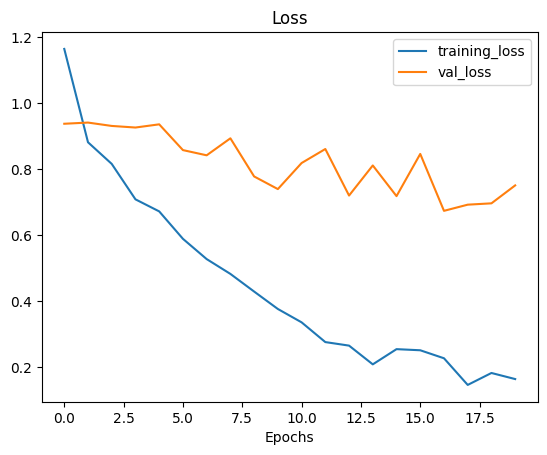

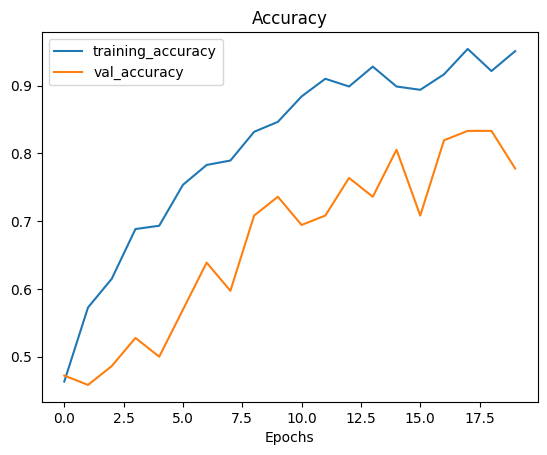

In [21]:
plot_loss_curves(history)

In [22]:
# model.save("ct-scan-model.h5")
model.save("ct-scan-model1.keras")